### Mount colab onto google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf
from keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Input, Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,roc_curve, recall_score,
                                  classification_report, f1_score, precision_score)

In [86]:
# Reading the CSV File
Customer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intro to AI Folder/Assignment 3/CustomerChurn_dataset.csv')

# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
Customer.head()

In [ ]:
# Check the number of rows and columns in the Customer
Customer.shape

In [ ]:
Customer.describe()

In [87]:
# Check for are Null Values
Customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check the data types of each column
Customer.info()

In [88]:
# From Customer dataset, 'TotalCharges' column has numericl values but we can see from the cell above that the data type of TotalCharges is object. We need to fix this issue.
Customer['TotalCharges'] = Customer['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [89]:
# check if TotalCharges has missing values
Customer['TotalCharges'].isnull().sum()

11

In [90]:
# From the cell above, TotalCharges 11 has missing values. Let's fill up the missing values
Customer['TotalCharges'] = Customer['TotalCharges'].fillna(Customer['TotalCharges'].median())

In [91]:
# confirm that the missing values in 'TotalCharges' has been imputed
Customer['TotalCharges'].isnull().sum()

0

In [92]:
# Looking at the format of the column names, there is an inconsistency. Lets correct them.
# rename customerID to CustomerID
Customer.rename(columns={'customerID':'CustomerID', }, inplace=True)

#  rename gender to Gender
Customer.rename(columns={'gender':'Gender', }, inplace=True)

# rename tenure to Tenure
Customer.rename(columns={'tenure':'Tenure', }, inplace=True)

In [93]:
# Some columns can be correct to have exactly two kinds of unique values so that they are either 'yes' or 'no'. Lets correct them
# correct 'No internet service' to 'No'
columns_having_no_internet_service = ['OnlineBackup','StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in columns_having_no_internet_service :
    Customer[i]  = Customer[i].replace({'No internet service' : 'No'})

# correct 'No phone service' to 'No'
Customer['MultipleLines'] = Customer['MultipleLines'].replace({'No phone service' : 'No'})

In [94]:
# Lets look at the dataset after all the changes above
Customer.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
Customer.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Exploratory Data Analysis (EDA)

In [ ]:
# display the features or column names in Customer dataset
print("\nData Features:")
print(Customer.columns.tolist())

In [ ]:
# show if there are any missing values
print("\nMissing values:",Customer.isnull().sum().values.sum())

In [ ]:
# display the number of uniques values in eavh column
print("\n\nUnique values:")
print(Customer.nunique())

In [ ]:
## number of customers who have churned
Customer["Churn"].value_counts()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plotting a proportional bar graph for the 'Churn' column
churn_proportions = Customer['Churn'].value_counts(normalize=True)
sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette="viridis")

plt.title('Proportion of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Proportion')

# Display the plot
plt.show()


<ipython-input-52-c286fbf7aaee>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y='Count', hue='Gender', data=gender_counts, palette="viridis", ci=None)


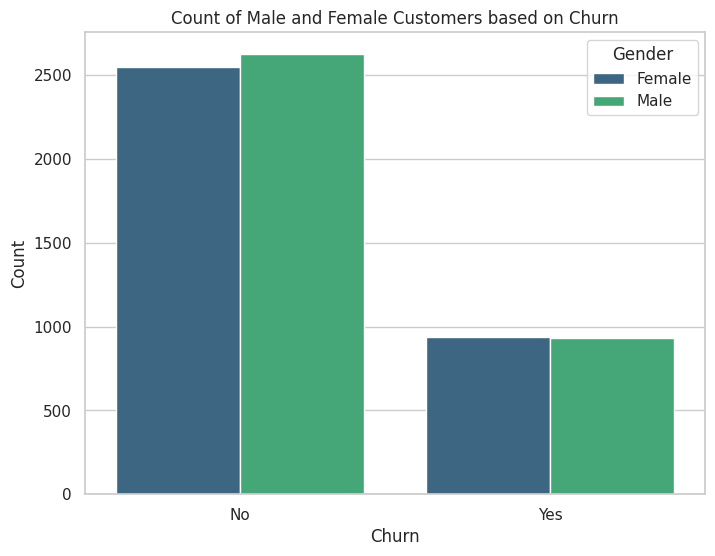

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Count the number of males and females within each Churn category
gender_counts = Customer.groupby(['Churn', 'Gender']).size().reset_index(name='Count')

# Plotting a bar graph of Churn based on Gender
sns.barplot(x='Churn', y='Count', hue='Gender', data=gender_counts, palette="viridis", ci=None)

# Adding labels and title
plt.title('Count of Male and Female Customers based on Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Display the plot
plt.show()

Summary Statistics:
        SeniorCitizen       Tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


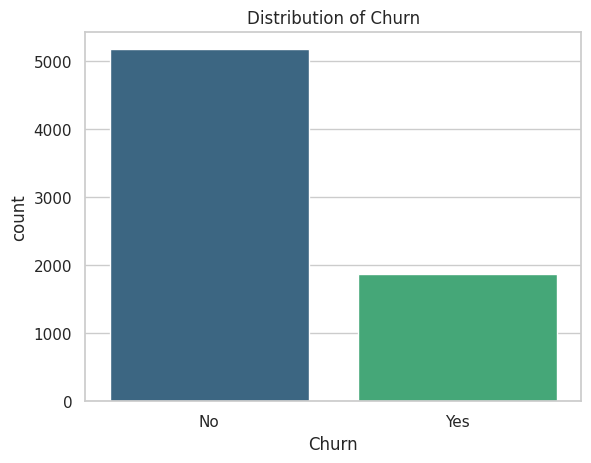

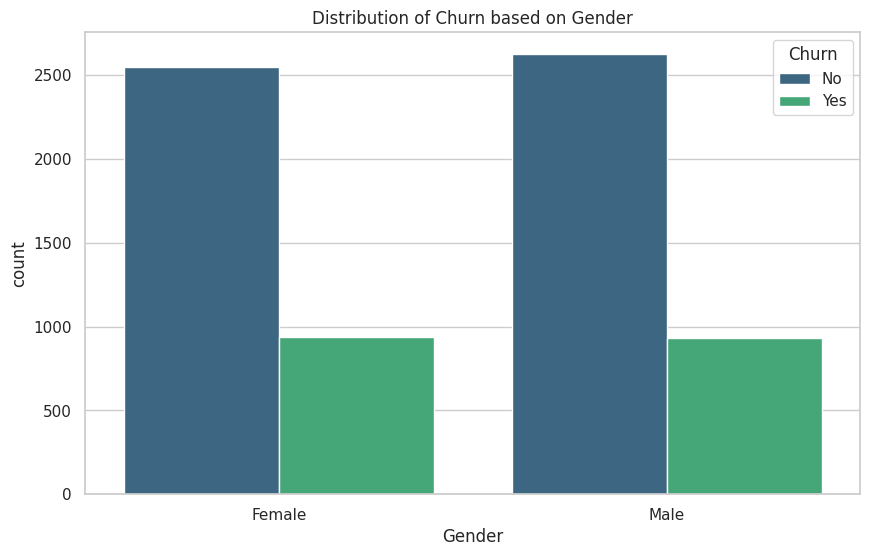

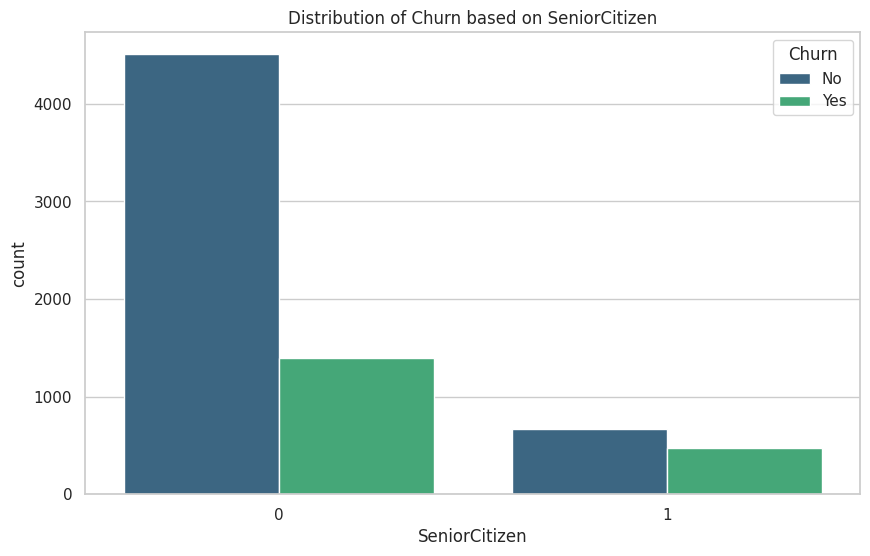

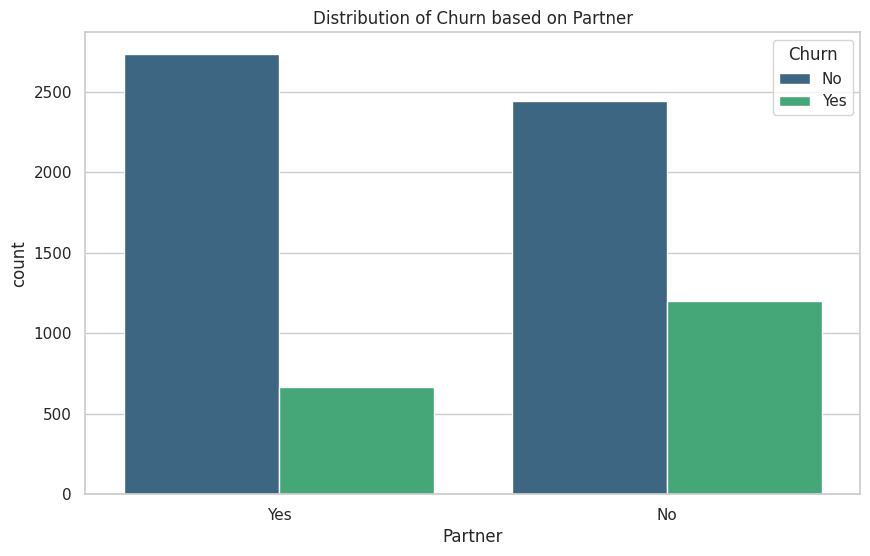

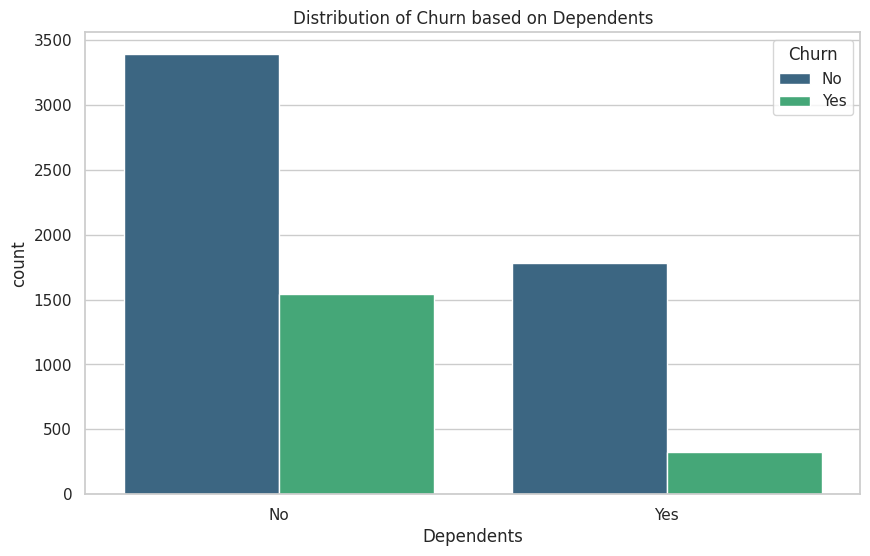

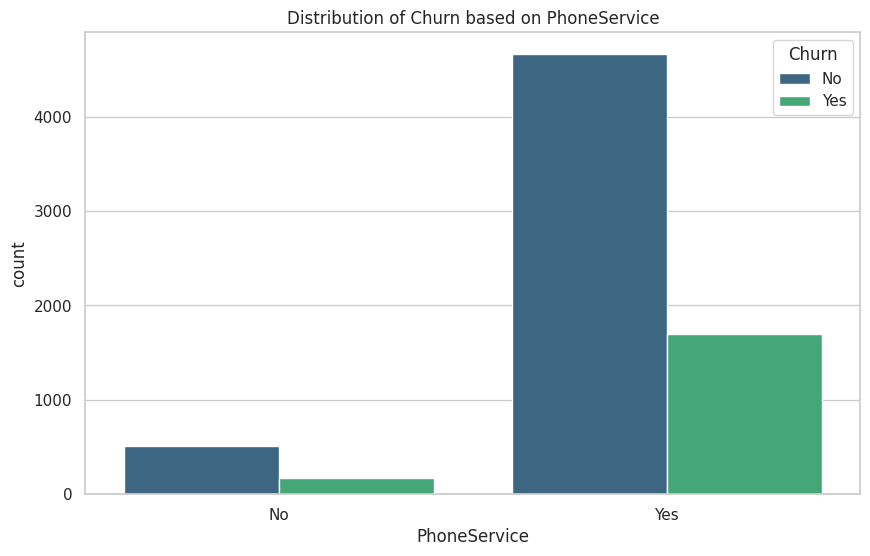

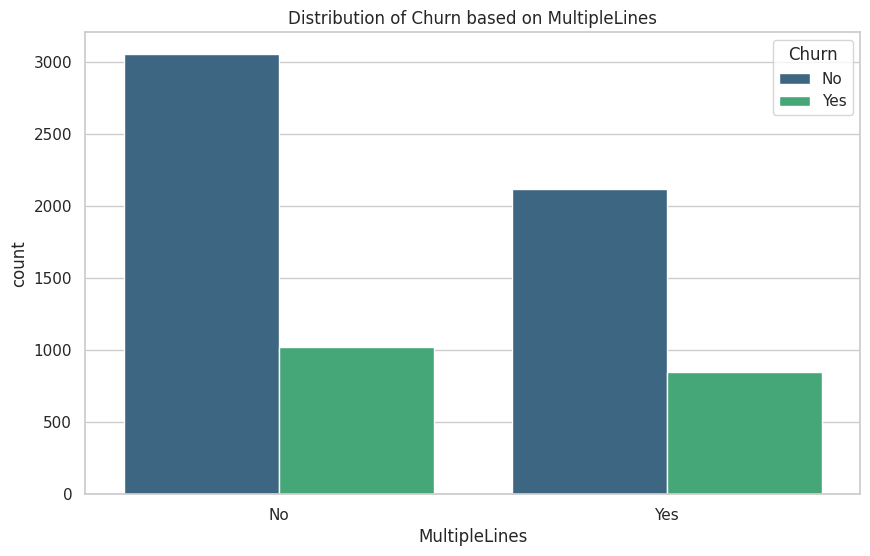

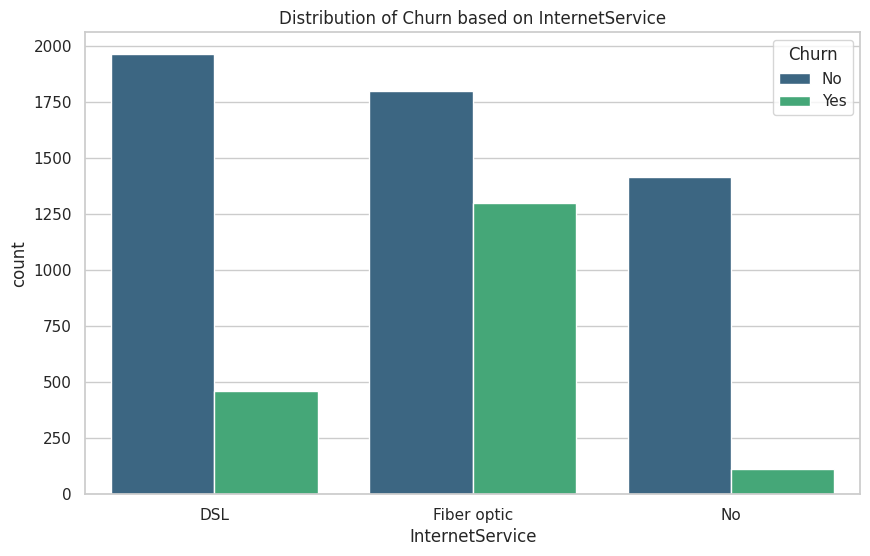

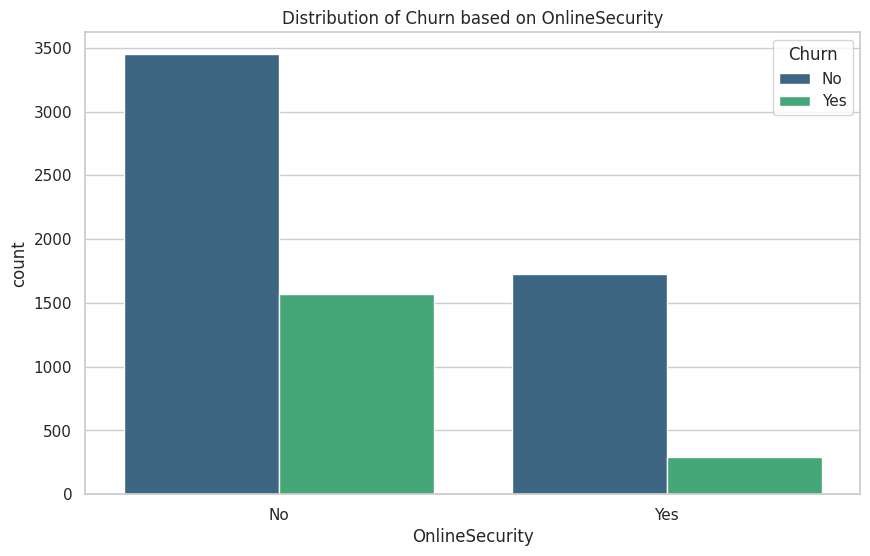

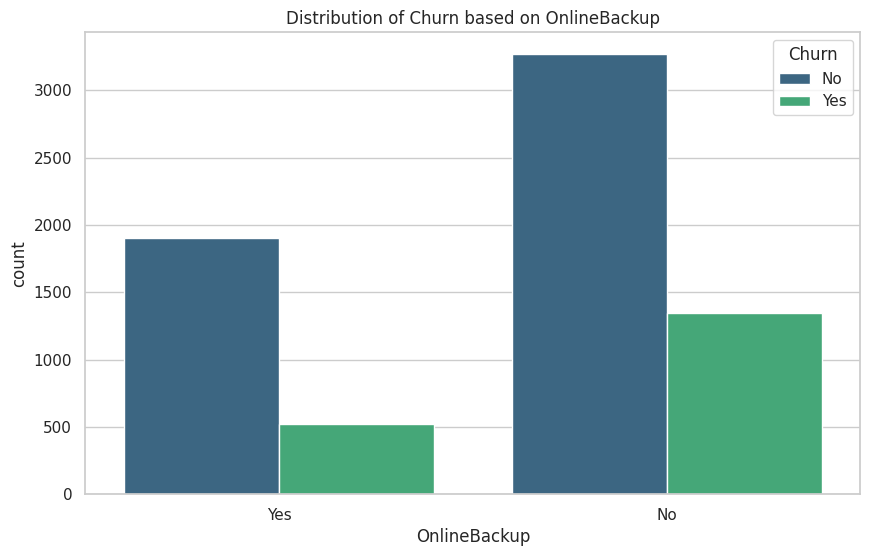

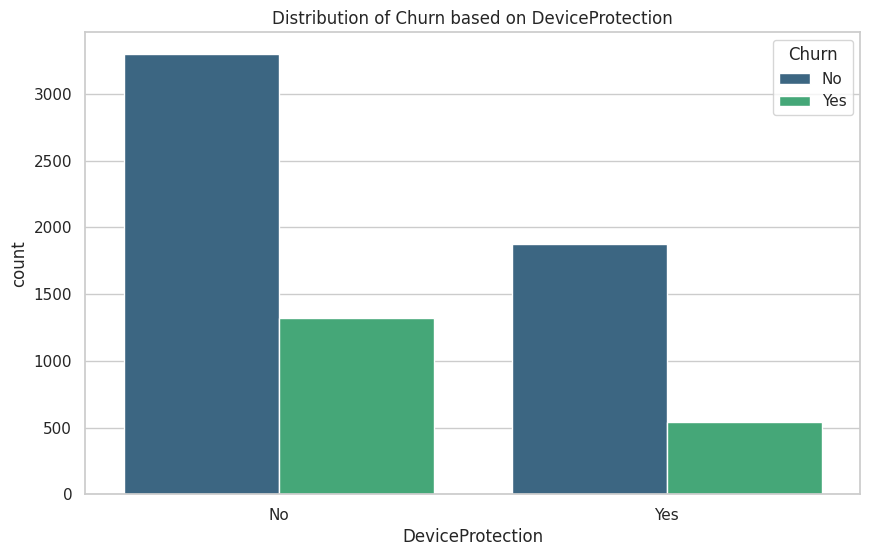

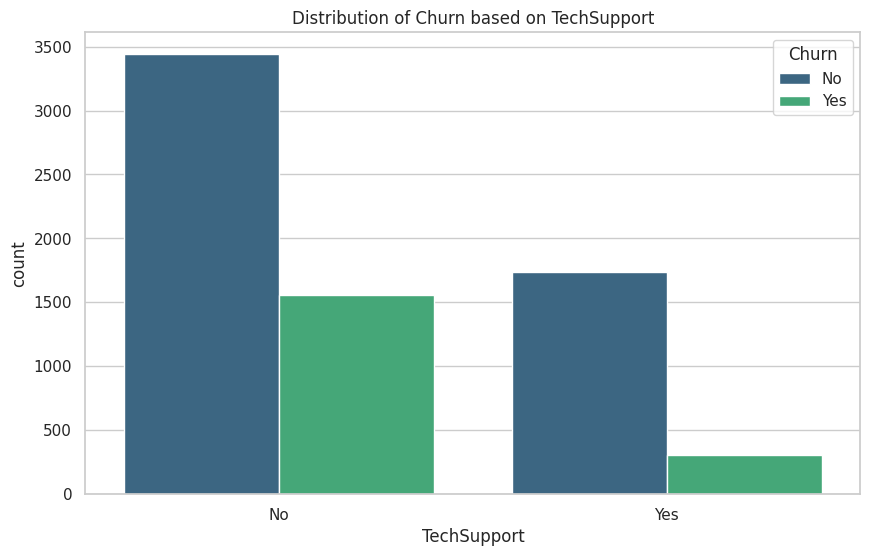

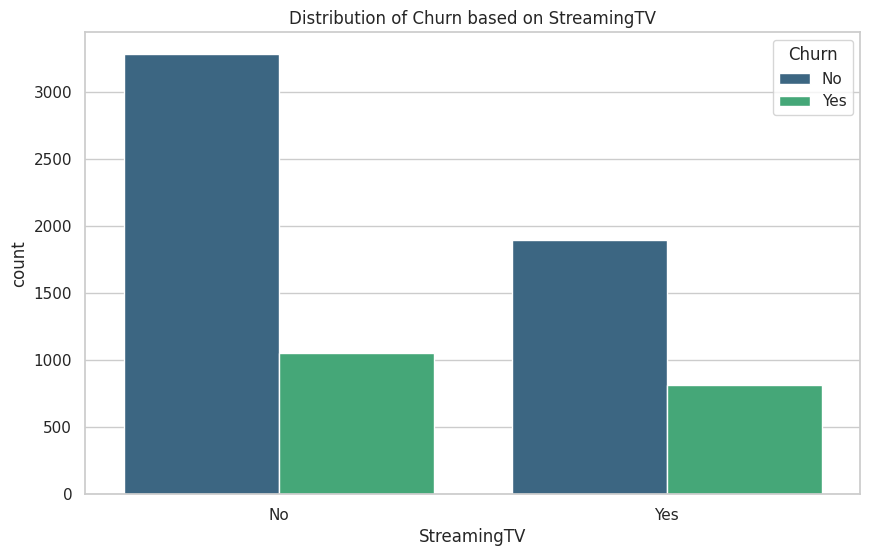

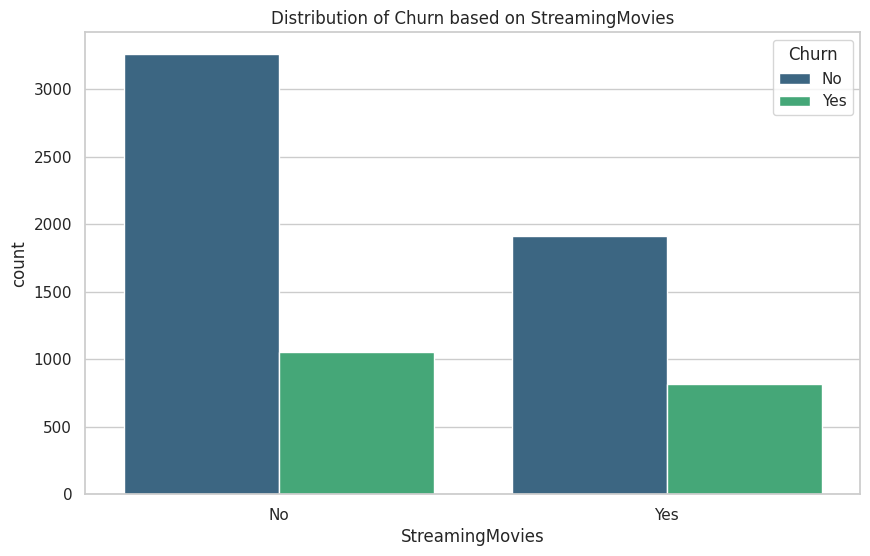

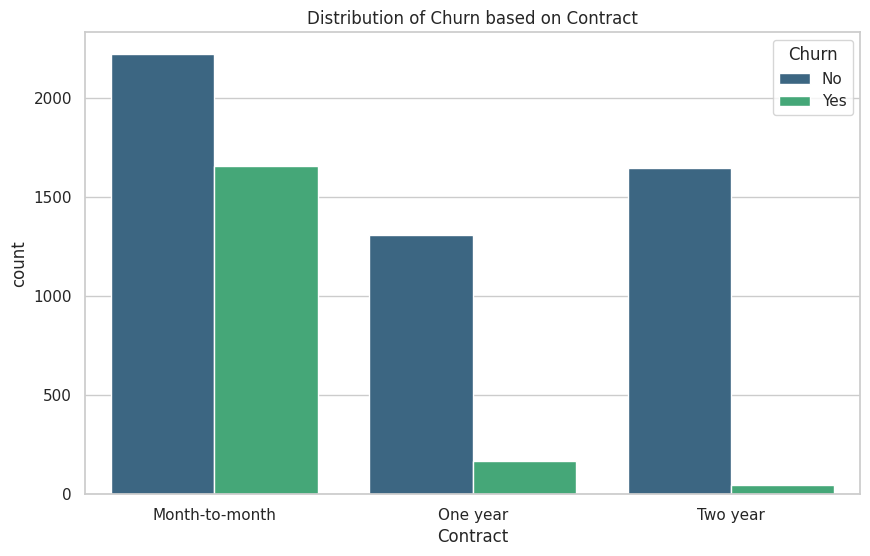

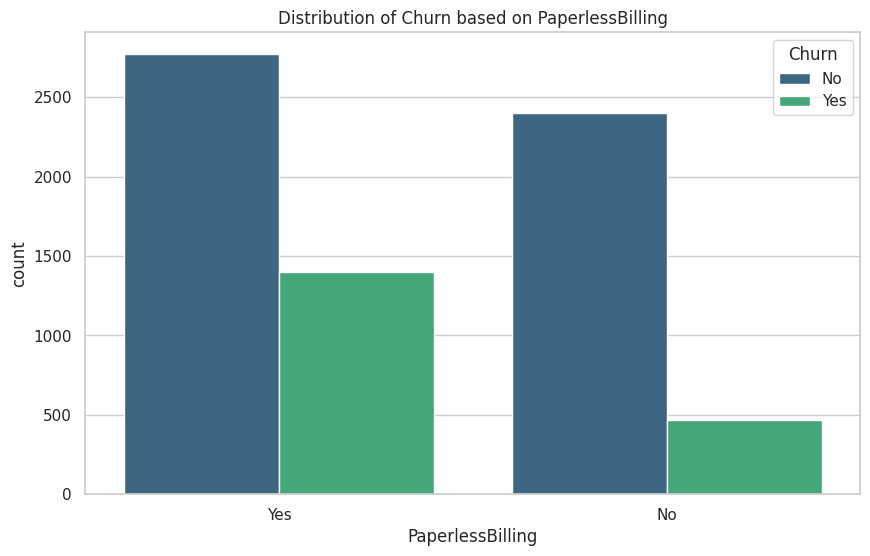

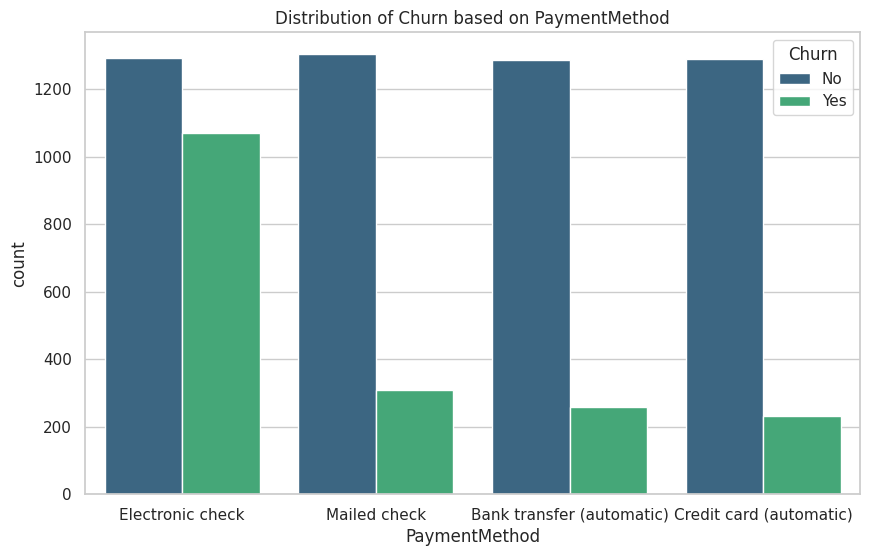

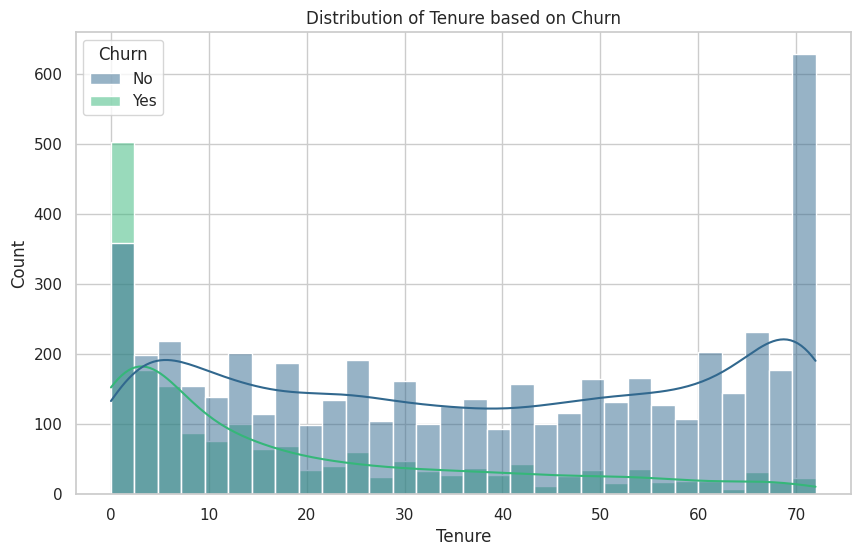

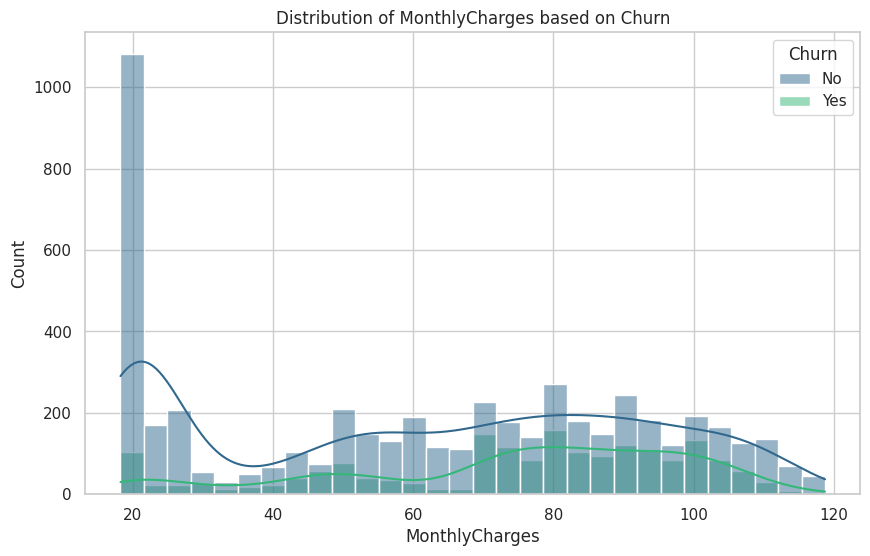

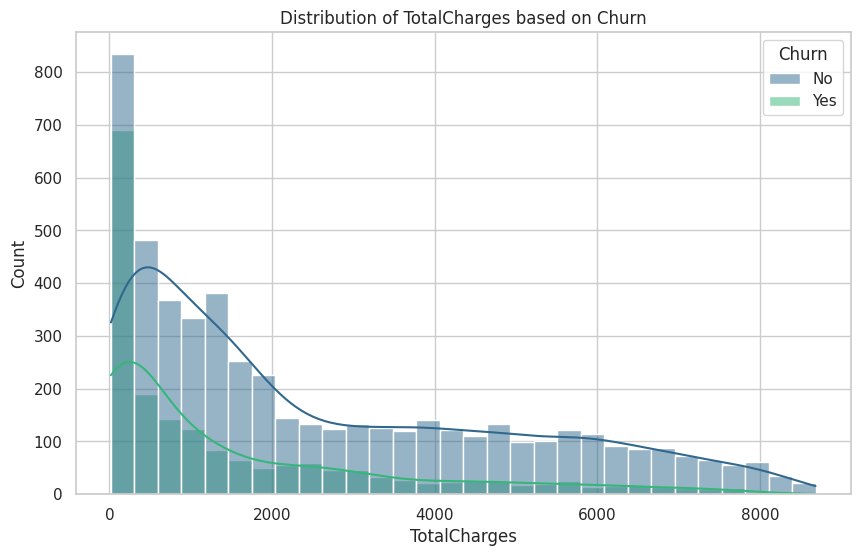

<ipython-input-55-958f2b61f950>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Customer.corr()


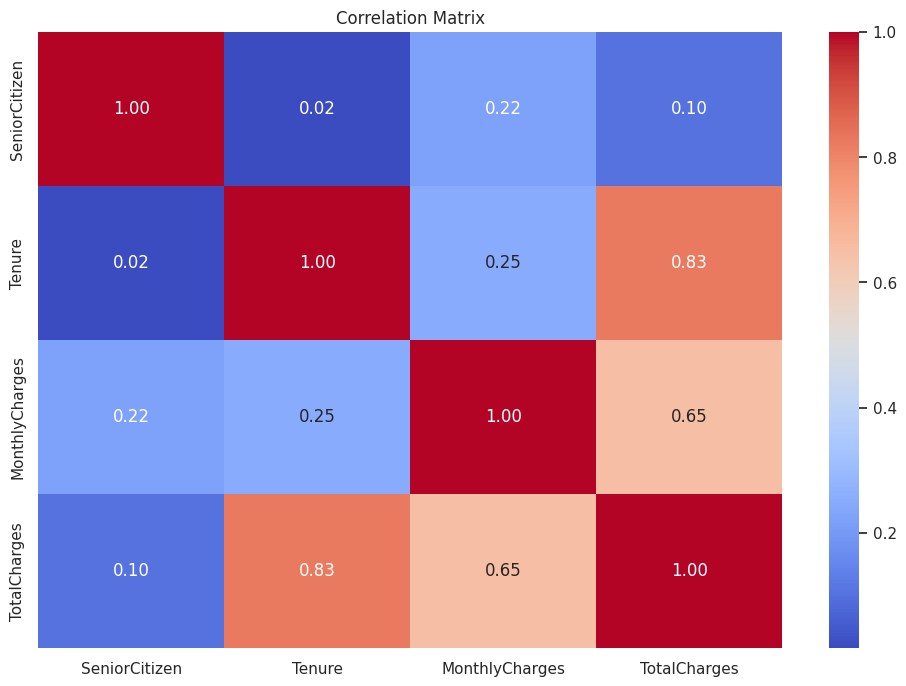

In [55]:
print("Summary Statistics:\n", Customer.describe())

# Visualize the distribution of the 'Churn' variable
sns.countplot(x='Churn', data=Customer, palette="viridis")
plt.title('Distribution of Churn')
plt.show()

# Explore categorical variables
categorical_columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=Customer, palette="viridis")
    plt.title(f'Distribution of Churn based on {column}')
    plt.show()

# Explore numerical variables
numerical_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=Customer, x=column, hue='Churn', bins=30, kde=True, palette="viridis")
    plt.title(f'Distribution of {column} based on Churn')
    plt.show()

# Explore the correlation matrix
correlation_matrix = Customer.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*The correlation matrix shows the visual representation of the numerical variables. It uses colour intensity to represent the strength and direction of correlations. Positive correlations are shown in warmer colors, negative correlations in cooler colors, and no correlation in shades of white.*




### Data Pre-processing

In [96]:
# Let's drop 'CustomerID'; it is not relevant for customer churn prediction
selected_features = Customer.drop(['CustomerID'], axis = 1)

In [ ]:
selected_features.head()

In [ ]:
selected_features.shape

In [97]:
# Let's retrieve categorical features the dataset; selected_features
categorical_columns = selected_features.select_dtypes(include=['object']).columns

In [98]:
# Put the categorical features into a list
categorical_columns = categorical_columns.tolist()
categorical_columns

['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [99]:
## Use Label encoding to convert all categorical columns to numeric
label_encoder = LabelEncoder()
for column in categorical_columns:
    selected_features[column] = label_encoder.fit_transform(selected_features[column])

In [100]:
selected_features.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Feature Selection Using Random Forest classifier

In [101]:
X = selected_features.drop(['Churn'], axis = 1)
y = selected_features['Churn']

In [104]:
X.shape

(7043, 19)

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest classifier
rfc = RandomForestClassifier()

# Fit the classifier
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature names and their importances
df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df = df.sort_values(by='Importance', ascending=False)

# Plot feature importances
top_features = 15  # Change this value to plot a different number of top features
plt.figure(figsize=(12, 6))
plt.barh(df['Feature'][:top_features], df['Importance'][:top_features])
plt.xlabel('Degree of Importance')
plt.title('Feature Importance')
plt.show()
relevant_features=df['Feature'][:top_features].values

# Display the list of important features
print("\n\nRelevant features:")
print(relevant_features)

### Training, Oversampling and Model Creation

In [109]:
X = selected_features[relevant_features]
y = selected_features['Churn']

In [110]:
X.shape

(7043, 15)

In [ ]:
X.head()

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# scale the X_trin and X_test
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
X_train

In [115]:
# The dataset is imbalanced. Let's oversample the minority class until the number of data points are equal to that of the majority class.
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [ ]:
y_train.value_counts()

In [124]:
# Define the architecture of the neural network using the Functional API

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Dense layers
dense_layer_1 = Dense(64, activation='relu')(input_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer, name="model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

## Display the model summary
model.summary()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_9 (Dense)             (None, 64)                1024      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
45/45 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7587
Test Loss: 0.4741295278072357, Test Accuracy: 0.7586941123008728
45/45 [

In [125]:
## Evaluate the model's accuracy and calculate the AUC value.
y_pred = model.predict(X_test)
predictions = [np.round(value) for value in y_pred]

## Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

45/45 [==============================] - 0s 1ms/step
Accuracy: 75.87%


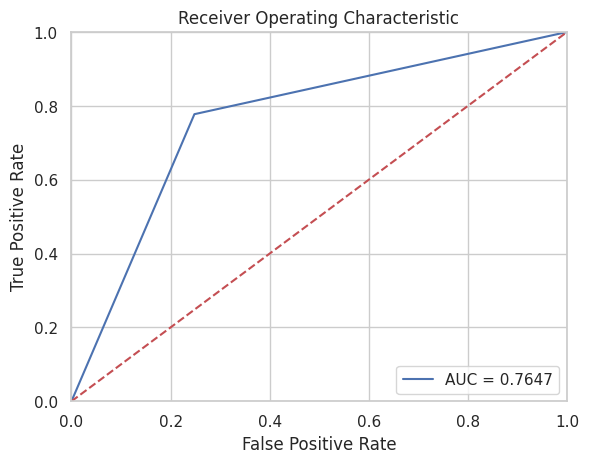

In [126]:
## Calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [127]:
## Calculating the confidence factor
cofidence_factor = 2.58 * sqrt( (accuracy * (1 - accuracy)) / y_test.shape[0])
cofidence_factor

0.02940908600491026

In [132]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Function to create the Keras model
def create_model(units=64):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(units, activation='relu')(input_layer)
    dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=True)

# Define a smaller hyperparameter space for grid search
param_grid = {
    'batch_size': [32],
    'optimizer': ['adam'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring=['accuracy', 'roc_auc'], refit='roc_auc', cv=3, verbose=True)
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=True)

# Print the best parameters and corresponding accuracy
print("Accuracy is : %f using best parameters: %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_result.best_estimator_
best_model_main = grid_result.best_estimator_.model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

print(f'Test AUC: {test_auc}, Test Accuracy: {test_accuracy}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
173/173 [==============================] - 3s 8ms/step - loss: 0.5089 - accuracy: 0.7600 - val_loss: 0.4831 - val_accuracy: 0.7509
Epoch 2/5
173/173 [==============================] - 1s 6ms/step - loss: 0.4626 - accuracy: 0.7796 - val_loss: 0.4897 - val_accuracy: 0.7559
Epoch 3/5
173/173 [==============================] - 1s 8ms/step - loss: 0.4528 - accuracy: 0.7901 - val_loss: 0.4706 - val_accuracy: 0.7587
Epoch 4/5
173/173 [==============================] - 3s 16ms/step - loss: 0.4473 - accuracy: 0.7863 - val_loss: 0.5016 - val_accuracy: 0.7410
Epoch 5/5
87/87 [==============================] - 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
173/173 [==============================] - 3s 7ms/step - loss: 0.5559 - accuracy: 0.7096 - val_loss: 0.4992 - val_accuracy: 0.7360
Epoch 2/5
173/173 [==============================] - 1s 7ms/step - loss: 0.4822 - accuracy: 0.7649 - val_loss: 0.4839 - val_accuracy: 0.7488
Epoch 3/5
173/173 [==============================] - 1s 7ms/step - loss: 0.4716 - accuracy: 0.7702 - val_loss: 0.5273 - val_accuracy: 0.7197
Epoch 4/5
173/173 [==============================] - 1s 7ms/step - loss: 0.4657 - accuracy: 0.7749 - val_loss: 0.4850 - val_accuracy: 0.7509
Epoch 5/5
87/87 [==============================] - 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
173/173 [==============================] - 6s 18ms/step - loss: 0.5216 - accuracy: 0.7410 - val_loss: 0.4767 - val_accuracy: 0.7587
Epoch 2/5
173/173 [==============================] - 3s 15ms/step - loss: 0.4833 - accuracy: 0.7691 - val_loss: 0.4890 - val_accuracy: 0.7566
Epoch 3/5
173/173 [==============================] - 2s 11ms/step - loss: 0.4750 - accuracy: 0.7700 - val_loss: 0.4850 - val_accuracy: 0.7594
Epoch 4/5
173/173 [==============================] - 1s 6ms/step - loss: 0.4713 - accuracy: 0.7736 - val_loss: 0.4779 - val_accuracy: 0.7658
Epoch 5/5
87/87 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
259/259 [==============================] - 2s 4ms/step - loss: 0.5046 - accuracy: 0.7583 - val_loss: 0.4582 - val_accuracy: 0.7672
Epoch 2/5
259/259 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7716 - val_loss: 0.4622 - val_accuracy: 0.7729
Epoch 3/5
259/259 [==============================] - 1s 3ms/step - loss: 0.4651 - accuracy: 0.7773 - val_loss: 0.4692 - val_accuracy: 0.7665
Epoch 4/5
259/259 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7806 - val_loss: 0.4968 - val_accuracy: 0.7473
Epoch 5/5
259/259 [==============================] - 1s 4ms/step - loss: 0.4523 - accuracy: 0.7841 - val_loss: 0.5009 - val_accuracy: 0.7339
Accuracy is : 0.856508 using best parameters: {'batch_size': 32, 'optimizer': 'adam'}
Best Parameters: {'batch_size': 32, 'optimizer': 'adam'}
45/45 [==============================] - 0s 3ms/step
Test AUC: 0.7684018756404816, Test Accuracy: 0.7338537970191625


In [ ]:
# Evaluate the best model on the test set
test_loss = best_model.score(X_test, y_test)

# Using best_model.predict_proba for obtaining probability estimates
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Test Loss: {test_loss}, Test AUC: {test_auc}, Test Accuracy: {test_accuracy}')

In [135]:
## Save the model
model = model.save('churn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [136]:
## load the saved model to use for prediction
model = load_model('churn_model.h5')

In [137]:
# Evaluate the saved model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7587
Test Loss: 0.4741295278072357, Test Accuracy: 0.7586941123008728


In [ ]:
## Evaluate the saved model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

## Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"\nAUC Score: {auc_score}")